In [2]:
from concorde.tsp import TSPSolver
from matplotlib import collections  as mc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import pylab as pl


In [3]:
cities = pd.read_csv('input/cities.csv')

In [4]:
cities.X[0]

316.83673906150904

In [3]:
# Instantiate solver
solver = TSPSolver.from_data(
    cities.X,
    cities.Y,
    norm="EUC_2D"
)

t = time.time()
tour_data = solver.solve(time_bound = 60.0, verbose = True, random_seed = 42) # solve() doesn't seem to respect time_bound for certain values?
print(time.time() - t)
print(tour_data.found_tour)

#tour_data.tour

7316.548758029938
True


In [11]:
tour_data.tour.max()

0

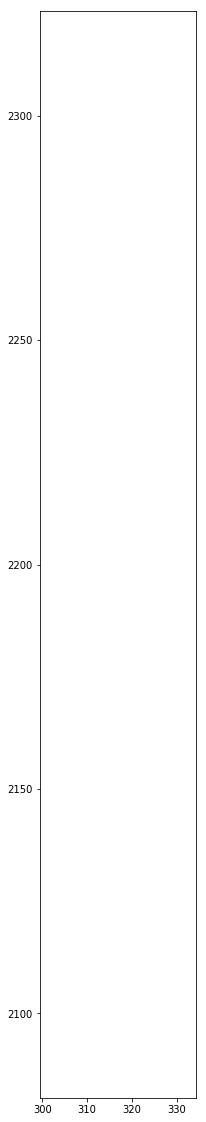

In [4]:
pd.DataFrame({'Path': np.append(tour_data.tour,[0])}).to_csv('submission.csv', index=False)

# Plot tour
lines = [[(cities.X[tour_data.tour[i]],cities.Y[tour_data.tour[i]]),(cities.X[tour_data.tour[i+1]],cities.Y[tour_data.tour[i+1]])] for i in range(0,len(cities)-1)]
lc = mc.LineCollection(lines, linewidths=2)
fig, ax = pl.subplots(figsize=(20,20))
ax.set_aspect('equal')
ax.add_collection(lc)
ax.autoscale()

In [7]:
import math
from sympy import isprime

In [8]:
def distance(x1, y1, x2, y2, prev_is_prime, is_10th):
    # Every 10th step is 10% more lengthy unless coming from a prime CityId.
    cost_factor = 1.1 if is_10th and not prev_is_prime else 1.0
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2) * cost_factor

In [9]:
# The function to calculate score.
# The beginning and end of the paths must be City'0'.

def calculate_score(paths, cities_df):
    cities_df['IsPrime'] = cities_df['CityId'].apply(isprime)
    cities_df_dict = cities_df.to_dict()

    sum_distance = 0
    prev_x, prev_y = cities_df_dict['X'][0], cities_df_dict['Y'][0]
    prev_is_prime = False

    for i, city in enumerate(paths):
        x, y = cities_df_dict['X'][city], cities_df_dict['Y'][city]
        is_prime = cities_df_dict['IsPrime'][city]

        sum_distance += distance(prev_x, prev_y, x, y, prev_is_prime, i % 10 == 0)
        prev_x, prev_y = x, y
        prev_is_prime = is_prime

    return sum_distance

In [10]:
cities_df = pd.read_csv("input/cities.csv")
submission = pd.read_csv('submission.csv')

score = calculate_score(submission['Path'], cities_df)
print(score)

1518043.4728760002


In [11]:
cities_df.head()

,CityId,X,Y,IsPrime
0,0,316.836739,2202.340707,False
1,1,4377.405972,336.602082,False
2,2,3454.158198,2820.053011,True
3,3,4688.099298,2935.898056,True
4,4,1010.696952,3236.750989,False


In [13]:
submission.head()

,Path
0,0
1,78934
2,111804
3,52086
4,89712
